In [ ]:
# Definition der Verzeichnisse und Zielgrößen
from pathlib import Path

base_dir = Path(r"C:\Develop\Python\PyCharmProjects\iu_computer_vision\training\datasets\Fussgaenger")
input_dir = base_dir                  # Originale (JPG) liegen hier
cropped_dir = base_dir / "cropped"    # zugeschnittene PNGs
resized_dir = base_dir / "resized"    # finale PNGs (nach Resize)

horizontal_dir = base_dir / "horizontal"
resized_horizontal_dir = base_dir / "resized_horizontal"
resized_horizontal_cropped_dir = base_dir / "resized_horizontal_cropped"

target_width = 1360
target_height = 800
target_aspect_ratio = target_width / target_height

print(f"Eingabeordner: {input_dir}")
print(f"Cropped-Bilder: {cropped_dir}")
print(f"Resized-Bilder: {resized_dir}")
print(f"Ziel: {target_width}×{target_height} (AR={target_aspect_ratio:.2f})")


Eingabeordner: C:\Develop\Python\PyCharmProjects\iu_computer_vision\training\datasets\Fussgaenger
Cropped-Bilder: C:\Develop\Python\PyCharmProjects\iu_computer_vision\training\datasets\Fussgaenger\cropped
Resized-Bilder: C:\Develop\Python\PyCharmProjects\iu_computer_vision\training\datasets\Fussgaenger\resized
Ziel: 1360×1020 (AR=1.33)


In [ ]:
# Zuschneiden der Bilder auf das Ziel-Seitenverhältnis, berechnet
from PIL import Image

cropped_dir.mkdir(parents=True, exist_ok=True)

for p in input_dir.rglob("*.JPEG"):
    if p.is_relative_to(cropped_dir) or p.is_relative_to(resized_dir):
        continue  # keine eigenen Ausgabeverzeichnisse verarbeiten

    rel = p.relative_to(input_dir)
    out_path = (cropped_dir / rel).with_suffix(".png")
    out_path.parent.mkdir(parents=True, exist_ok=True)

    im = Image.open(p)  # erwartet 1536x2048 Portrait
    w, h = im.size
    new_h = int(round(w / target_aspect_ratio))  # z.B. 1536 / 1.7 ≈ 903
    top = (h - new_h) // 2
    cropped = im.crop((0, top, w, top + new_h))
    cropped.save(out_path)  # PNG
print("Cropping abgeschlossen.")


Cropping abgeschlossen.


In [22]:
# Zuschneiden der Bilder auf das Ziel-Seitenverhältnis, fixe Werte
from pathlib import Path
from PIL import Image

# Konfiguration
input_dir = resized_horizontal_dir
cropped_dir = resized_horizontal_cropped_dir
CROP_TOP = 110
CROP_BOTTOM = 110

cropped_dir.mkdir(parents=True, exist_ok=True)

for p in input_dir.glob("*.png"):
    out_path = cropped_dir / (p.stem + ".png")
    im = Image.open(p)
    w, h = im.size
    im.crop((0, CROP_TOP, w, h - CROP_BOTTOM)).save(out_path)

print("Cropping abgeschlossen.")


Cropping abgeschlossen.


In [ ]:
# Resize der zugeschnittenen Bilder auf die Zielauflösung
from PIL import Image

resized_dir.mkdir(parents=True, exist_ok=True)

for p in cropped_dir.rglob("*.png"):
    rel = p.relative_to(cropped_dir)
    out_path = (resized_dir / rel).with_suffix(".png")
    out_path.parent.mkdir(parents=True, exist_ok=True)

    im = Image.open(p)
    im.resize((target_width, target_height), resample=Image.BICUBIC).save(out_path)

print("Resize abgeschlossen.")


Resize abgeschlossen.


In [21]:
# Resize der horizontalen Bilder auf die Zielauflösung
from PIL import Image, ImageOps

resized_horizontal_dir.mkdir(parents=True, exist_ok=True)

for p in horizontal_dir.rglob("*.JPEG"):
    out_path = resized_horizontal_dir / (p.stem + ".png")
    im = ImageOps.exif_transpose(Image.open(p))
    im.resize((target_width, target_height), resample=Image.BICUBIC).save(out_path)

print("Resize abgeschlossen.")


Resize abgeschlossen.


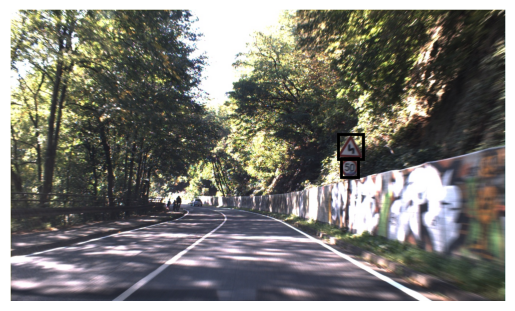

In [24]:
# Check Bonunding Box 
IMAGE_PATH = r"C:\Develop\Python\PyCharmProjects\iu_computer_vision\training\datasets\gtsdb\yolo_training\train\images\FullIJCNN2013_00004.jpg"
LABEL_PATH = r"C:\Develop\Python\PyCharmProjects\iu_computer_vision\training\datasets\gtsdb\yolo_training\train\labels\FullIJCNN2013_00004.txt"

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = Image.open(IMAGE_PATH).convert("RGB")
w, h = img.size
fig, ax = plt.subplots()
ax.imshow(img); ax.axis('off')

for line in open(LABEL_PATH):
    cls, xc, yc, bw, bh = line.split()
    xc, yc, bw, bh = map(float, (xc, yc, bw, bh))
    x = (xc - bw/2) * w
    y = (yc - bh/2) * h
    ax.add_patch(patches.Rectangle((x, y), bw*w, bh*h, fill=False, linewidth=2))

plt.show()



Get-ChildItem *.jpg | Rename-Item -NewName { ($_.Name -replace '_png\.rf\..*', '') + '.jpg' }
Get-ChildItem *.txt | Rename-Item -NewName { ($_.Name -replace '_png\.rf\..*', '') + '.txt' }
